In [77]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn

In [78]:
data = pd.read_csv("data.csv")

In [79]:
data.head()


,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2041 [YR2041],2042 [YR2042],2043 [YR2043],2044 [YR2044],2045 [YR2045],2046 [YR2046],2047 [YR2047],2048 [YR2048],2049 [YR2049],2050 [YR2050]
0,Afghanistan,AFG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,81.717739,82.755907,83.304573,83.550740,83.734450,83.962159,...,49.057098,48.405124,47.772482,47.153619,46.547368,46.014974,45.488733,44.972113,44.471497,43.992485
1,Afghanistan,AFG,"Age dependency ratio, old",SP.POP.DPND.OL,5.086262,5.132609,5.139524,5.111895,5.056182,4.976304,...,6.254638,6.431854,6.615935,6.808329,7.010657,7.235972,7.465706,7.699483,7.935899,8.175734
2,Afghanistan,AFG,"Age dependency ratio, young",SP.POP.DPND.YG,76.631477,77.623299,78.165049,78.438845,78.678267,78.985855,...,42.802460,41.973270,41.156547,40.345290,39.536712,38.779002,38.023028,37.272630,36.535598,35.816751
3,Afghanistan,AFG,"Age population, age 0, female, interpolated",SP.POP.AG00.FE.IN,178556.000000,182674.000000,185434.000000,187513.000000,189945.000000,193553.000000,...,NaN,NaN,NaN,NaN,452000.000000,NaN,NaN,NaN,NaN,430000.000000
4,Afghanistan,AFG,"Age population, age 0, male, interpolated",SP.POP.AG00.MA.IN,177635.000000,181588.000000,185852.000000,190462.000000,195498.000000,201014.000000,...,NaN,NaN,NaN,NaN,476000.000000,NaN,NaN,NaN,NaN,452000.000000


In [80]:
df = pd.read_csv("definitions_and_sources.csv")

In [81]:
df.head()

,Code,Indicator Name,Long definition,Source
0,SP.POP.DPND,Age dependency ratio (% of working-age populat...,Age dependency ratio is the ratio of dependent...,World Bank staff estimates based on age distri...
1,SP.POP.DPND.OL,"Age dependency ratio, old (% of working-age po...","Age dependency ratio, old, is the ratio of old...",World Bank staff estimates based on age distri...
2,SP.POP.DPND.YG,"Age dependency ratio, young (% of working-age ...","Age dependency ratio, young, is the ratio of y...",World Bank staff estimates based on age distri...
3,SP.POP.AG00.FE.IN,"Age population, age 0, female, interpolated","Age population, female refers to female popula...",The United Nations Population Division’s World...
4,SP.POP.AG00.MA.IN,"Age population, age 0, male, interpolated","Age population, male refers to male population...",The United Nations Population Division’s World...


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44812 entries, 0 to 44811
Data columns (total 95 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   44809 non-null  object 
 1   Country Code   44807 non-null  object 
 2   Series Name    44807 non-null  object 
 3   Series Code    44807 non-null  object 
 4   1960 [YR1960]  35850 non-null  float64
 5   1961 [YR1961]  35986 non-null  float64
 6   1962 [YR1962]  36459 non-null  float64
 7   1963 [YR1963]  36025 non-null  float64
 8   1964 [YR1964]  36056 non-null  float64
 9   1965 [YR1965]  36073 non-null  float64
 10  1966 [YR1966]  36085 non-null  float64
 11  1967 [YR1967]  36565 non-null  float64
 12  1968 [YR1968]  36123 non-null  float64
 13  1969 [YR1969]  36165 non-null  float64
 14  1970 [YR1970]  36200 non-null  float64
 15  1971 [YR1971]  36211 non-null  float64
 16  1972 [YR1972]  36691 non-null  float64
 17  1973 [YR1973]  36227 non-null  float64
 18  1974 [

In [83]:
data_trans = data.copy()


In [84]:
data_trans.isnull().sum()


Country Name         3
Country Code         5
Series Name          5
Series Code          5
1960 [YR1960]     8962
                 ...  
2046 [YR2046]    21753
2047 [YR2047]    20880
2048 [YR2048]    21753
2049 [YR2049]    21753
2050 [YR2050]    10307
Length: 95, dtype: int64

In [85]:
data_trans.select_dtypes(['object']).columns


Index(['Country Name', 'Country Code', 'Series Name', 'Series Code'], dtype='object')

In [86]:
data_trans.shape

(44812, 95)

In [87]:
popul_male_series_code = ['SP.POP.0004.MA','SP.POP.0509.MA','SP.POP.1014.MA','SP.POP.1519.MA','SP.POP.2024.MA','SP.POP.2529.MA','SP.POP.3034.MA','SP.POP.3539.MA','SP.POP.4044.MA','SP.POP.4549.MA','SP.POP.5054.MA','SP.POP.5559.MA','SP.POP.6064.MA','SP.POP.6569.MA','SP.POP.7074.MA','SP.POP.7579.MA','SP.POP.80UP.MA']
popul_female_series_code = ['SP.POP.0004.FE','SP.POP.0509.FE','SP.POP.1014.FE','SP.POP.1519.FE','SP.POP.2024.FE','SP.POP.2529.FE','SP.POP.3034.FE','SP.POP.3539.FE','SP.POP.4044.FE','SP.POP.4549.FE','SP.POP.5054.FE','SP.POP.5559.FE','SP.POP.6064.FE','SP.POP.6569.FE','SP.POP.7074.FE','SP.POP.7579.FE','SP.POP.80UP.FE']

In [88]:
popul_male_age_wise = data.loc[data['Series Code'].isin(popul_male_series_code)]
popul_male_age_wise[['Country Name']].describe()

,Country Name
count,4403
unique,259
top,Afghanistan
freq,17


In [89]:
popul_female_age_wise = data.loc[data['Series Code'].isin(popul_female_series_code)]
popul_female_age_wise[['Country Name']].describe()

,Country Name
count,4403
unique,259
top,Afghanistan
freq,17


In [90]:
popul_total_age_wise = pd.concat([popul_male_age_wise, popul_female_age_wise])
popul_total_age_wise[['Country Name']].describe()

,Country Name
count,8806
unique,259
top,Afghanistan
freq,34


In [91]:
popul_country_wise = popul_total_age_wise.groupby('Country Name').sum()
popul_country_wise.head(5)

,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],1968 [YR1968],1969 [YR1969],...,2041 [YR2041],2042 [YR2042],2043 [YR2043],2044 [YR2044],2045 [YR2045],2046 [YR2046],2047 [YR2047],2048 [YR2048],2049 [YR2049],2050 [YR2050]
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,8996350.0,9166765.0,9345869.0,9533954.0,9731361.0,9938417.0,10152333.0,10372630.0,10604347.0,10854427.0,...,55682000.0,56438000.0,57177000.0,57901000.0,58615000.0,59309000.0,59989000.0,60649000.0,61299000.0,61928000.0
Albania,1608800.0,1659798.0,1711320.0,1762620.0,1814134.0,1864790.0,1914574.0,1965600.0,2022271.0,2081696.0,...,2803000.0,2791000.0,2780000.0,2759000.0,2747000.0,2729000.0,2718000.0,2704000.0,2690000.0,2676000.0
Algeria,11124892.0,11404859.0,11690152.0,11985132.0,12295973.0,12626953.0,12980269.0,13354197.0,13744383.0,14144437.0,...,53685000.0,54119000.0,54553000.0,54985000.0,55412000.0,55833000.0,56251000.0,56657000.0,57054000.0,57439000.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
popul_total_country_wise_1 = data.loc[data['Series Code'] == 'SP.POP.TOTL']
popul_total_country_wise_1.head(5)

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2041 [YR2041],2042 [YR2042],2043 [YR2043],2044 [YR2044],2045 [YR2045],2046 [YR2046],2047 [YR2047],2048 [YR2048],2049 [YR2049],2050 [YR2050]
165,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,55682000.0,56436000.0,57177000.0,57903000.0,58614000.0,59309000.0,59988000.0,60651000.0,61297000.0,61928000.0
338,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2805000.0,2791000.0,2776000.0,2761000.0,2746000.0,2731000.0,2717000.0,2702000.0,2687000.0,2673000.0
511,Algeria,DZA,"Population, total",SP.POP.TOTL,11124888.0,11404859.0,11690153.0,11985136.0,12295970.0,12626952.0,...,53684000.0,54120000.0,54554000.0,54985000.0,55412000.0,55834000.0,56250000.0,56658000.0,57054000.0,57437000.0
684,American Samoa,ASM,"Population, total",SP.POP.TOTL,20013.0,20486.0,21117.0,21882.0,22698.0,23520.0,...,58000.0,58000.0,58000.0,58000.0,58000.0,57000.0,57000.0,57000.0,57000.0,57000.0
857,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,79000.0,78000.0,78000.0,78000.0,78000.0,78000.0,78000.0,78000.0,77000.0,77000.0


In [93]:
popul_total = popul_total_country_wise_1.sum()
popul_total.head(7)

Country Name     AfghanistanAlbaniaAlgeriaAmerican SamoaAndorra...
Country Code     AFGALBDZAASMANDAGOATGARBARGARMABWAUSAUTAZEBHSB...
Series Name      Population, totalPopulation, totalPopulation, ...
Series Code      SP.POP.TOTLSP.POP.TOTLSP.POP.TOTLSP.POP.TOTLSP...
1960 [YR1960]                                        25749372002.0
1961 [YR1961]                                        26090486561.0
1962 [YR1962]                                        26543150616.0
dtype: object

In [94]:
popul_total_bn = popul_total[4:]/10 ** 9
popul_total_bn = popul_total_bn.reset_index()
popul_total_bn.head(5)

,index,0
0,1960 [YR1960],25.749372
1,1961 [YR1961],26.090487
2,1962 [YR1962],26.543151
3,1963 [YR1963],27.104409
4,1964 [YR1964],27.671098


In [95]:
popul_total_bn['Year'] = popul_total_bn['index'].str[:4].astype(int)
popul_total_bn['Population'] = popul_total_bn[0].astype(float)
popul_total_bn.drop(['index',0],axis=1,inplace=True)
popul_total_bn.head(5)

,Year,Population
0,1960,25.749372
1,1961,26.090487
2,1962,26.543151
3,1963,27.104409
4,1964,27.671098


In [96]:
popul_total_bn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        91 non-null     int32  
 1   Population  91 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 1.2 KB


NameError: name 'plot' is not defined

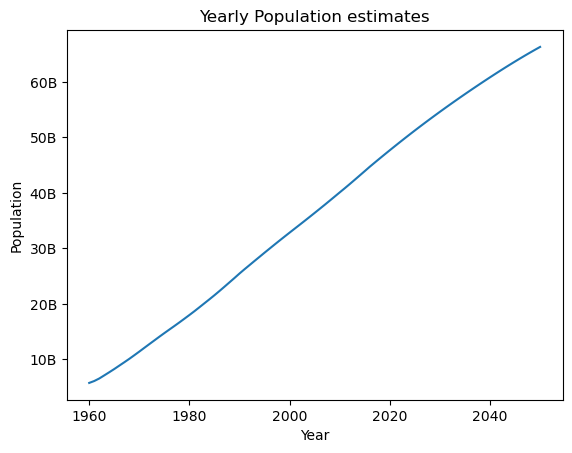

In [97]:
yp_lp = sn.lineplot(x='Year', y='Population', data=popul_total_bn)
yp_lp.set_title('Yearly Population estimates')
yp_lp.set_yticklabels([str(i) + 'B' for i in range(0,int(max(popul_total_bn['Population'])),10)])
plot.show()

In [98]:
pip install bar-chart-race


Note: you may need to restart the kernel to use updated packages.


In [99]:
pip install bar-chart-race


Note: you may need to restart the kernel to use updated packages.


In [100]:
import warnings
warnings.filterwarnings('ignore')

In [101]:
import bar_chart_race as bcr


In [102]:
?bcr.bar_chart_race

In [103]:
pip install ffmpeg


Note: you may need to restart the kernel to use updated packages.


Index(['Country Name', '2020[YR2020]'], dtype='object')


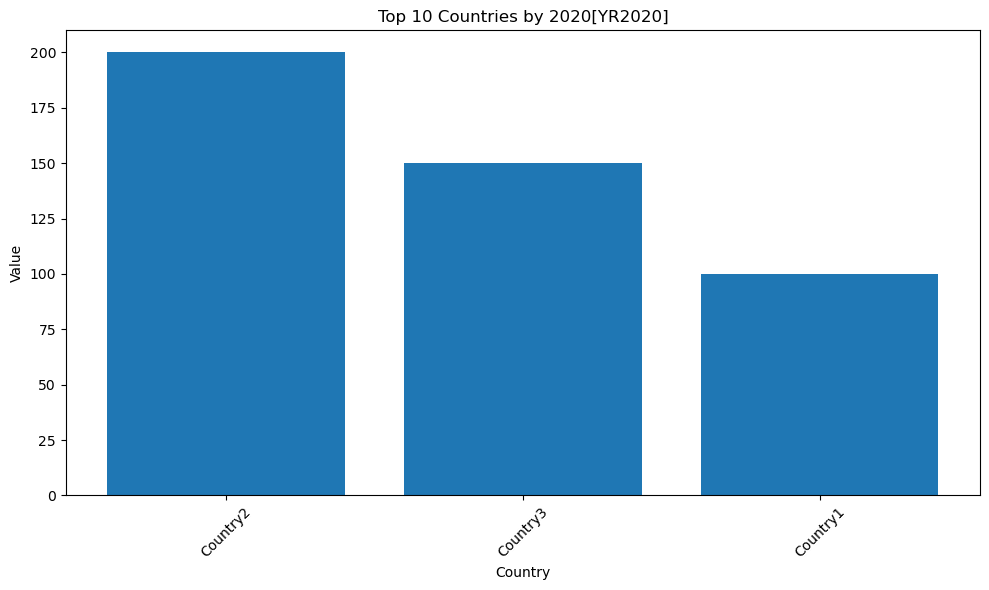

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame({
    'Country Name': ['Country1', 'Country2', 'Country3'],
    '2020[YR2020]': [100, 200, 150]
})

print(df.columns)
year = '2020[YR2020]'  
filtered_data = df.dropna(subset=[year])
filtered_data_sorted = filtered_data.sort_values(by=year, ascending=False)
top_10_countries = filtered_data_sorted.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_countries['Country Name'], top_10_countries[year])
plt.xlabel('Country')
plt.ylabel('Value')
plt.title(f'Top 10 Countries by {year}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


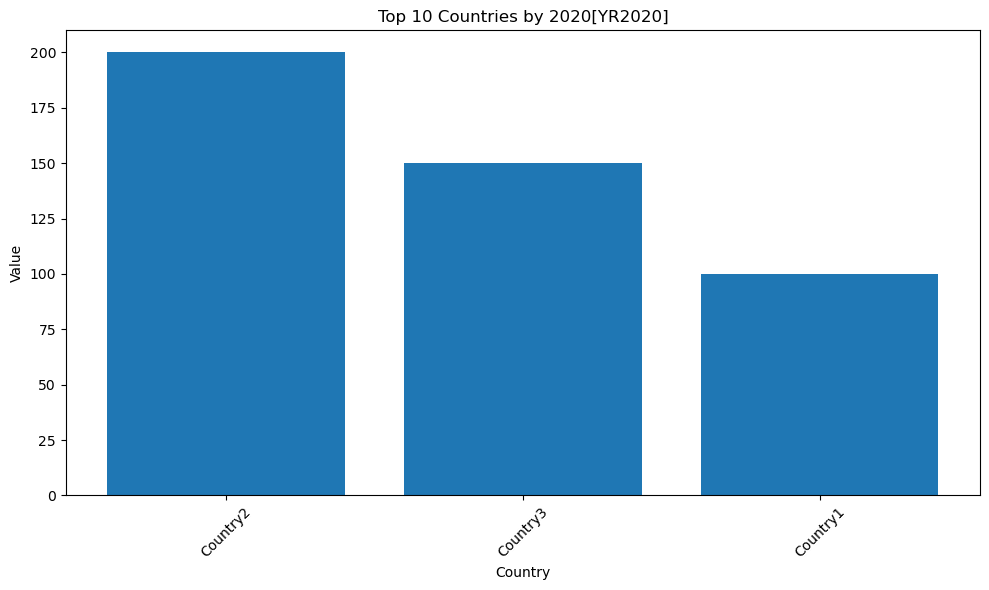

In [105]:
year = '2020[YR2020]' 
filtered_data = df.dropna(subset=[year])
filtered_data_sorted = filtered_data.sort_values(by=year, ascending=False)
top_10_countries = filtered_data_sorted.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_countries['Country Name'], top_10_countries[year])
plt.xlabel('Country')
plt.ylabel('Value')
plt.title(f'Top 10 Countries by {year}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


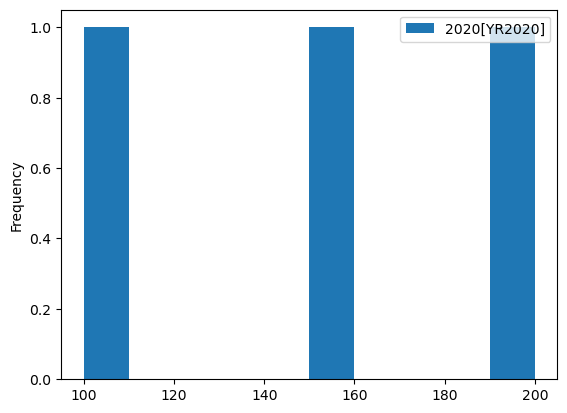

In [106]:
df.plot(x='Country Name', y='2020[YR2020]', kind='hist')
plt.show()


In [107]:
import plotly.express as px


In [108]:
import plotly.express as px
import pandas as pd

# Sample data structure
data = pd.DataFrame({
    'country': ['United States', 'Canada', 'Brazil'],
    'pop1980': [226542250, 24539720, 119033070],
    'pop2050': [398205190, 39467940, 231000000],
    'growthRate': [0.76, 0.85, 1.03]
})

required_columns = {'country', 'pop1980', 'pop2050', 'growthRate'}
if not required_columns.issubset(data.columns):
    raise ValueError(f"DataFrame is missing required columns: {required_columns - set(data.columns)}")



In [109]:
fig_1980 = px.choropleth(data,
                         locations='country',
                         locationmode='country names',
                         color='pop1980',
                         hover_name='country',
                         title='1980 Population',
                         template='plotly_dark',
                         color_continuous_scale='Blues'
                         )
fig_1980.update_layout(font=dict(size=17, family="Arial"),
                       title_font=dict(size=20, family="Arial", color="white"),
                       paper_bgcolor='black',
                       plot_bgcolor='black')
fig_1980.show()


In [110]:
fig_2050 = px.choropleth(data,
                         locations='country',
                         locationmode='country names',
                         color='pop2050',
                         hover_name='country',
                         title='2050 Population',
                         template='plotly_dark',
                         color_continuous_scale='Reds'
                         )
fig_2050.update_layout(font=dict(size=17, family="Arial"),
                       title_font=dict(size=20, family="Arial", color="white"),
                       paper_bgcolor='black',
                       plot_bgcolor='black')
fig_2050.show()

In [111]:
fig_growth_rate = px.choropleth(data,
                                locations='country',
                                locationmode='country names',
                                color='growthRate',
                                hover_name='country',
                                title='Growth Rate',
                                color_continuous_scale='Greens'
                                )
fig_growth_rate.update_layout(font=dict(size=17, family="Arial"),
                              title_font=dict(size=20, family="Arial", color="white"),
                              paper_bgcolor='black',
                              plot_bgcolor='black')
fig_growth_rate.show()